<a href="https://colab.research.google.com/github/Varshinirangu/ML_23AG1A66H9/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 49830096.86
R-squared: 0.90
Model Intercept: 25321.58
Model Coefficient (Slope): 9423.82


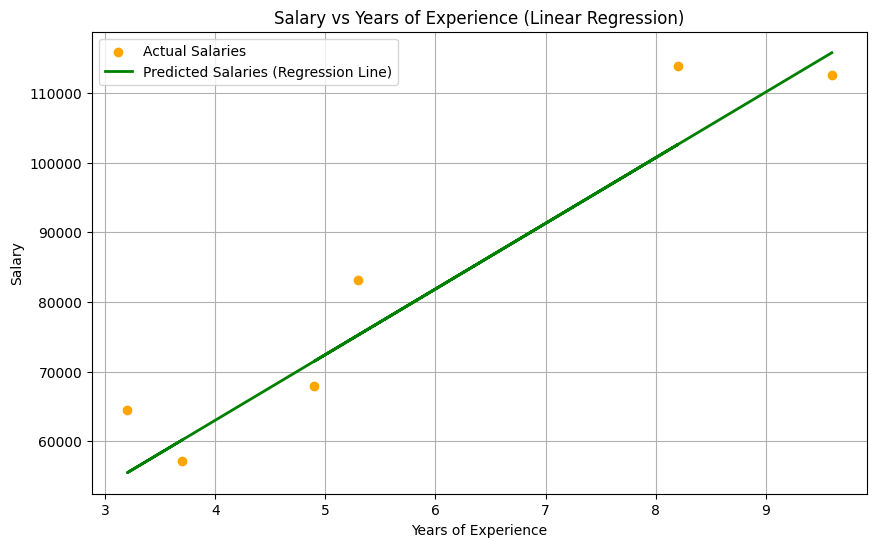

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Create a sample dataset
# Let's consider a simple relationship between 'YearsExperience' and 'Salary'
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}
df = pd.DataFrame(data)

# 2. Prepare the data for the model
X = df[['YearsExperience']]  # Independent variable (features)
y = df['Salary']             # Dependent variable (target)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model (optional, but good practice)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")

# 7. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='orange', label='Actual Salaries')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Predicted Salaries (Regression Line)')
plt.title('Salary vs Years of Experience (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


===== Car Dataset: CO2 vs Weight =====
Mean Squared Error: 70.38
R-squared: 0.19
Model Intercept: 84.94
Model Coefficient (Slope): 0.01


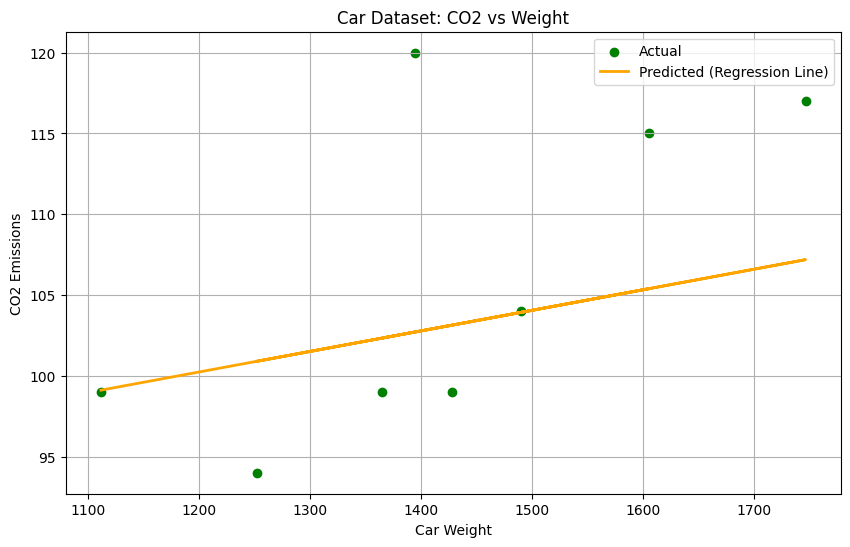

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------
# Load the datasets
# -----------------------
car_file = "/content/cars.csv"   # Car dataset

df_car = pd.read_csv(car_file)

# -----------------------
# Function to run regression
# -----------------------
def run_regression(X, y, xlabel, ylabel, title):
    # Handle missing values in y
    cleaned_data = pd.concat([X, y], axis=1).dropna(subset=[y.name])
    X_cleaned = cleaned_data[X.columns]
    y_cleaned = cleaned_data[y.name]


    # 1. Split into train & test
    X_train, X_test, y_train, y_test = train_test_split(
        X_cleaned, y_cleaned, test_size=0.2, random_state=42
    )

    # 2. Create & train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 3. Predict on test set
    y_pred = model.predict(X_test)

    # 4. Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {title} =====")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Model Intercept: {model.intercept_:.2f}")
    print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")

    # 5. Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='green', label='Actual')
    plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Predicted (Regression Line)')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------
# Dataset 1: Car dataset (Predict CO2 from Weight)
# -----------------------
run_regression(
    df_car[['Weight']], df_car['CO2'],
    xlabel="Car Weight", ylabel="CO2 Emissions",
    title="Car Dataset: CO2 vs Weight"
)